**Customer Personality Analysis** is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## <a name='Dataset_Features'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
1.2. Dataset Features</h3>
</div>

**People:**

* `ID`: Customer's unique identifier
* `Year_Birth`: Customer's birth year
* `Education`: Customer's education level
* `Marital_Status`: Customer's marital status
* `Income`: Customer's yearly household income
* `Kidhome`: Number of children in customer's household
* `Teenhome`: Number of teenagers in customer's household
* `Dt_Customer`: Date of customer's enrollment with the company
* `Recency`: Number of days since customer's last purchase
* `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

**Products:**

* `MntWines`: Amount spent on wine in last 2 years
* `MntFruits`: Amount spent on fruits in last 2 years
* `MntMeatProducts`: Amount spent on meat in last 2 years
* `MntFishProducts`: Amount spent on fish in last 2 years
* `MntSweetProducts`: Amount spent on sweets in last 2 years
* `MntGoldProds`: Amount spent on gold in last 2 years

**Promotion:**

* `NumDealsPurchases`: Number of purchases made with a discount
* `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place:**

* `NumWebPurchases`: Number of purchases made through the company’s website
* `NumCatalogPurchases`: Number of purchases made using a catalogue
* `NumStorePurchases`: Number of purchases made directly in stores
* `NumWebVisitsMonth`: Number of visits to company’s website in the last month

**Import libraries and data**

In [1]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# evaluations
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep="\t")

let's find if we have missing values in the dataset.

In [3]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

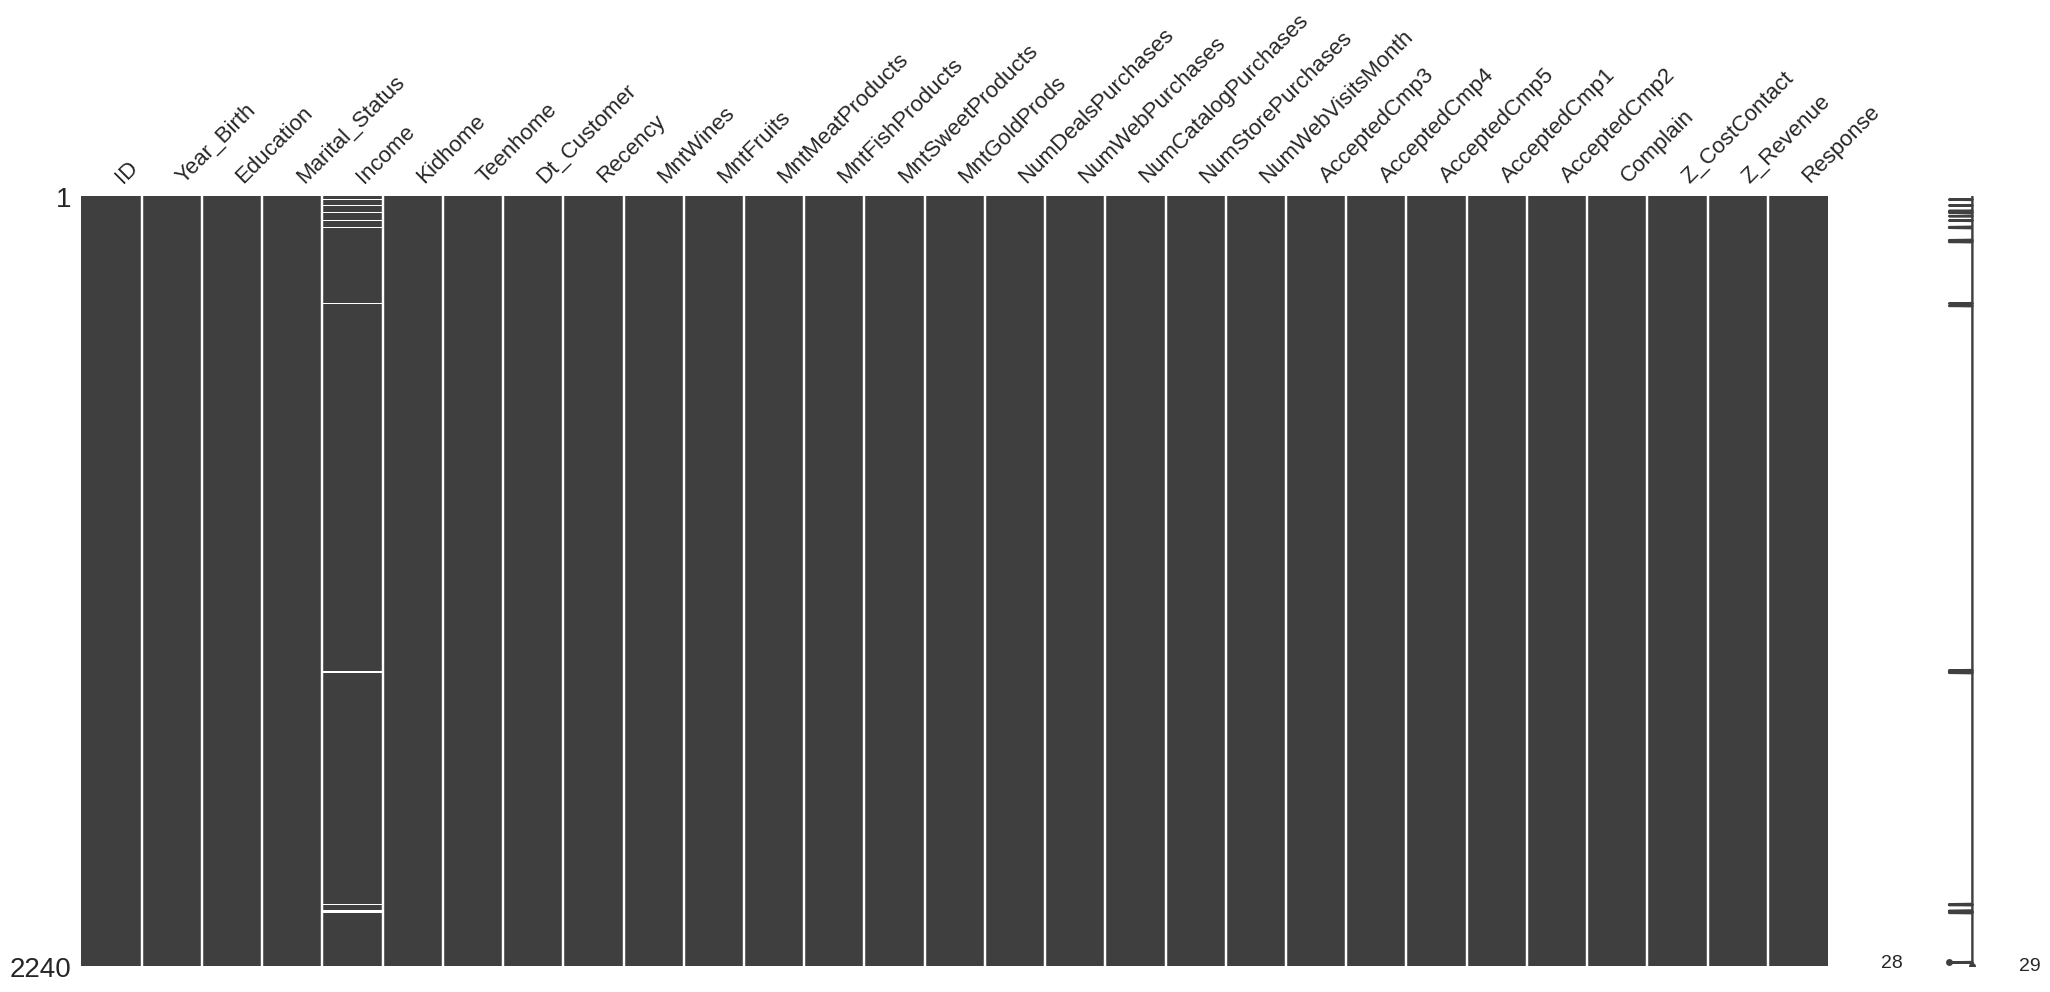

In [4]:
msno.matrix(data);

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

let's find if we have duplicate rows.

In [7]:
data.duplicated().sum()

0

**Feature Engineering**</h3>
</div>


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime

In [9]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [10]:
print("The newest customer's enrolment date in the records:", max(data['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(data['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

In [11]:
data['Age'] = 2024 - data['Year_Birth']

Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

In [12]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

In [13]:
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

Create a feature "Children" to indicate total children in a household that is, kids and teenagers.

In [14]:
data['Children'] = data['Kidhome'] + data['Teenhome']

To get further clarity of household, Creating feature indicating "Family_Size"

In [15]:
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Children']

Create a feature "Is_Parent" to indicate parenthood status

In [16]:
data['Is_Parent'] = np.where(data.Children > 0, 1, 0)

Segmenting education levels in three groups

In [17]:
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

Dropping some of the redundant features

In [18]:
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data = data.drop(to_drop, axis=1)

In [19]:
data.head(3)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,776,Partner,0,2,0


**Data Analysis and Visualization**</h3>
</div>

In [20]:
data.shape

(2216, 29)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

In [22]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2525.000000,3.000000,5.000000,1.000000


In [23]:
data.describe(include=object).T

,count,unique,top,freq
Education,2216,3,Graduate,1116
Living_With,2216,2,Partner,1430


**Plot new made features**

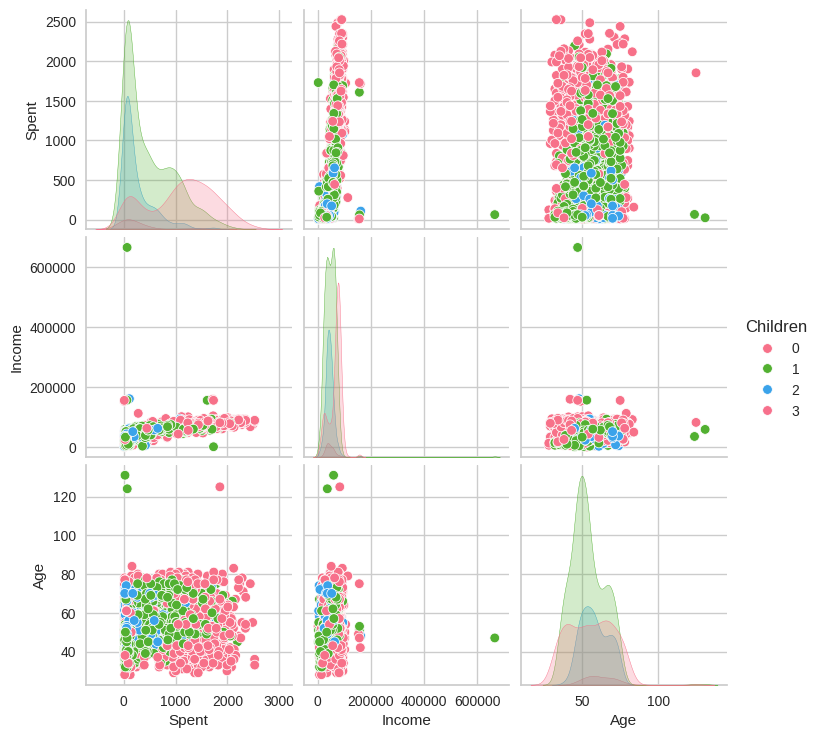

In [24]:
sns.pairplot(data , vars=['Spent','Income','Age'] , hue='Children', palette='husl');

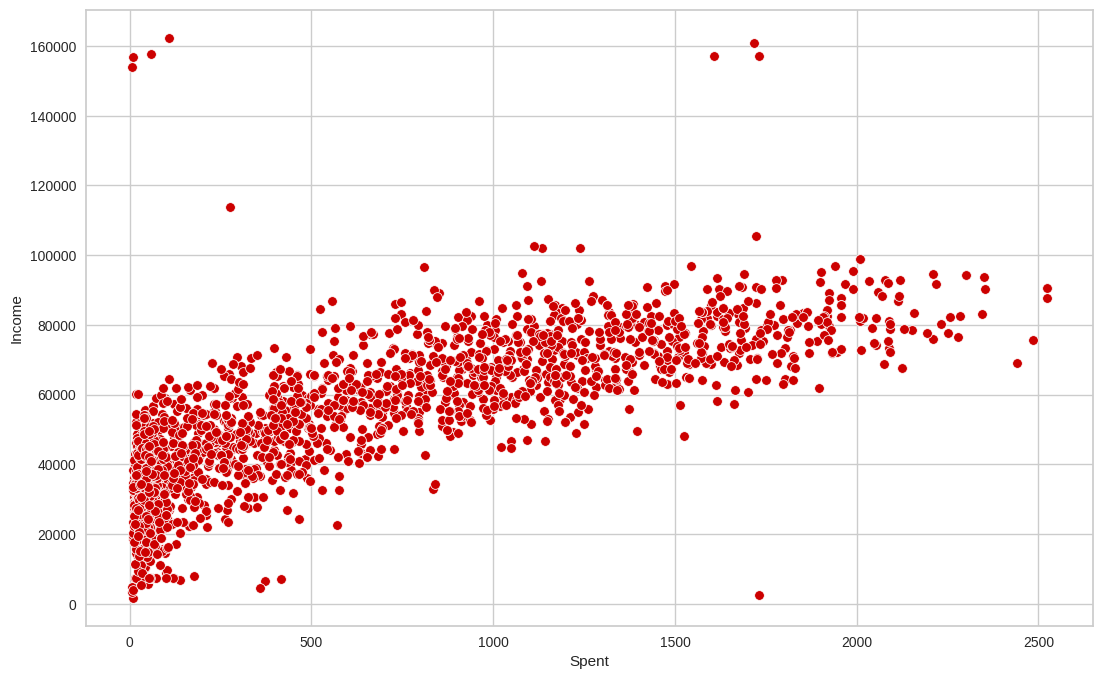

In [25]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income'], color='#cc0000');

**See relation between Age , spent**

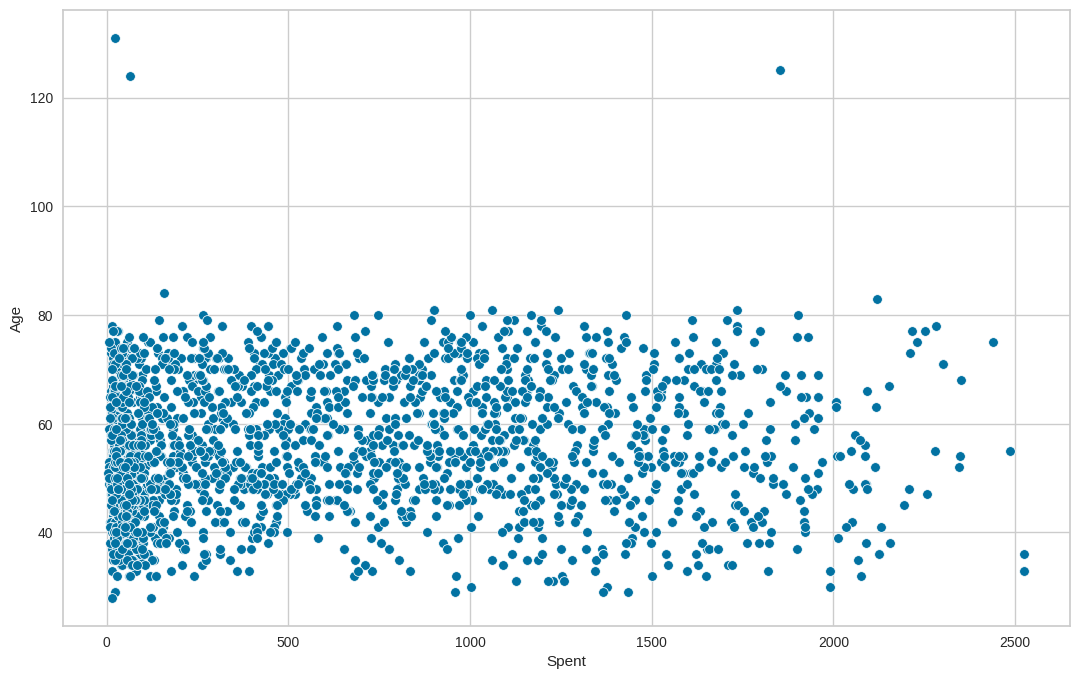

In [26]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Spent'], y=data['Age']);

**See relation between education , spent**

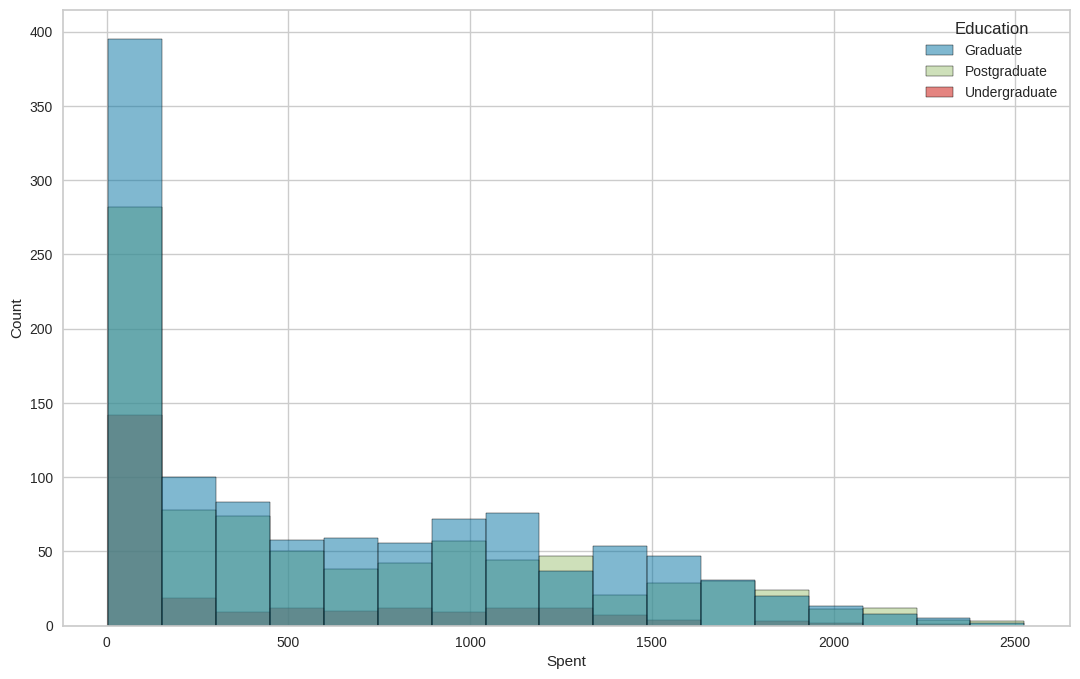

In [27]:
plt.figure(figsize=(13,8))
sns.histplot(x=data['Spent'], hue=data['Education']);

**See pie chart of Education types:**

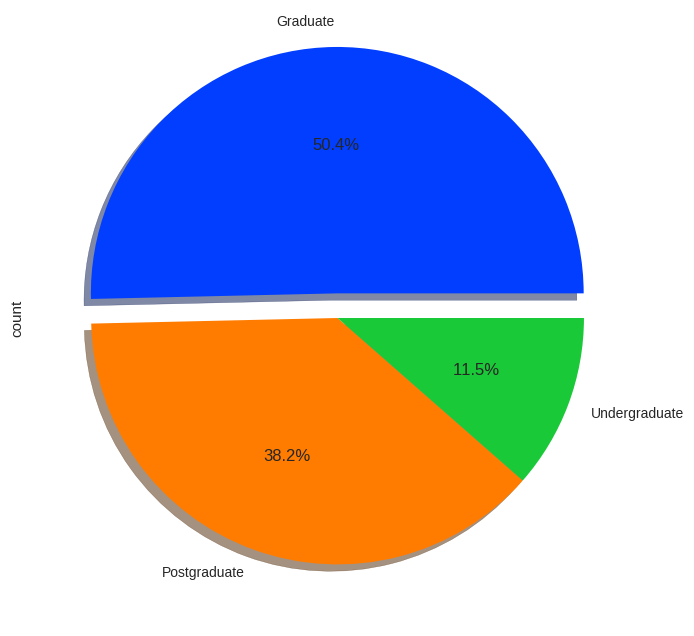

In [28]:
data['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('bright'));

**Detect Outliers and visualize them**</h3>
</div>


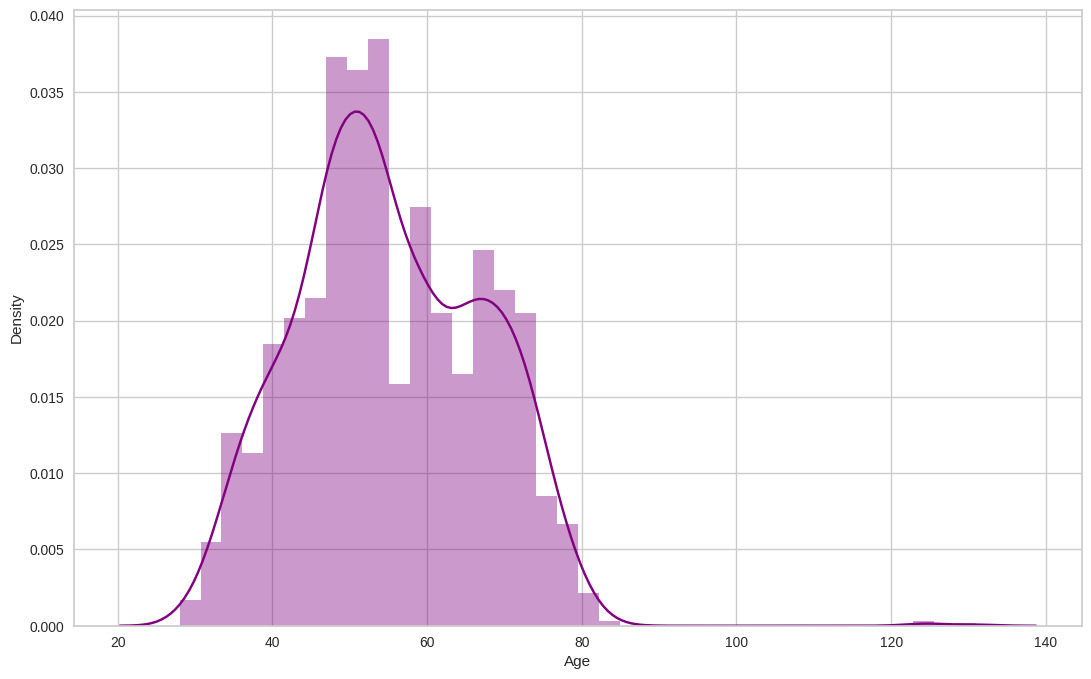

In [29]:
plt.figure(figsize=(13,8))
sns.distplot(data.Age, color='purple');

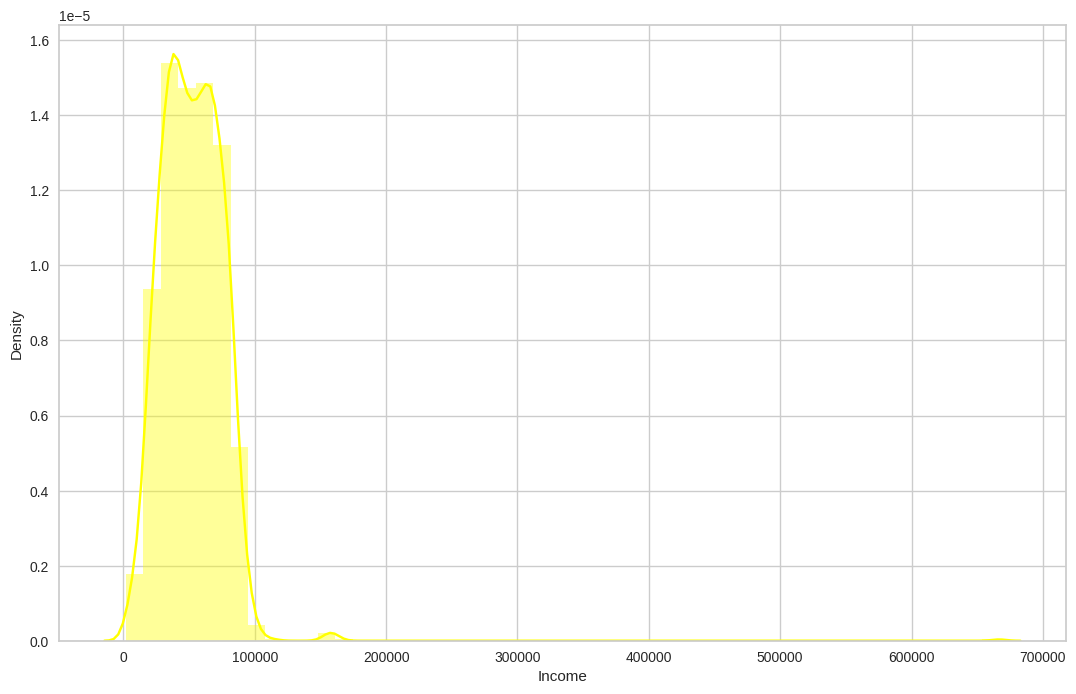

In [30]:
plt.figure(figsize=(13,8))
sns.distplot(data.Income, color='Yellow');

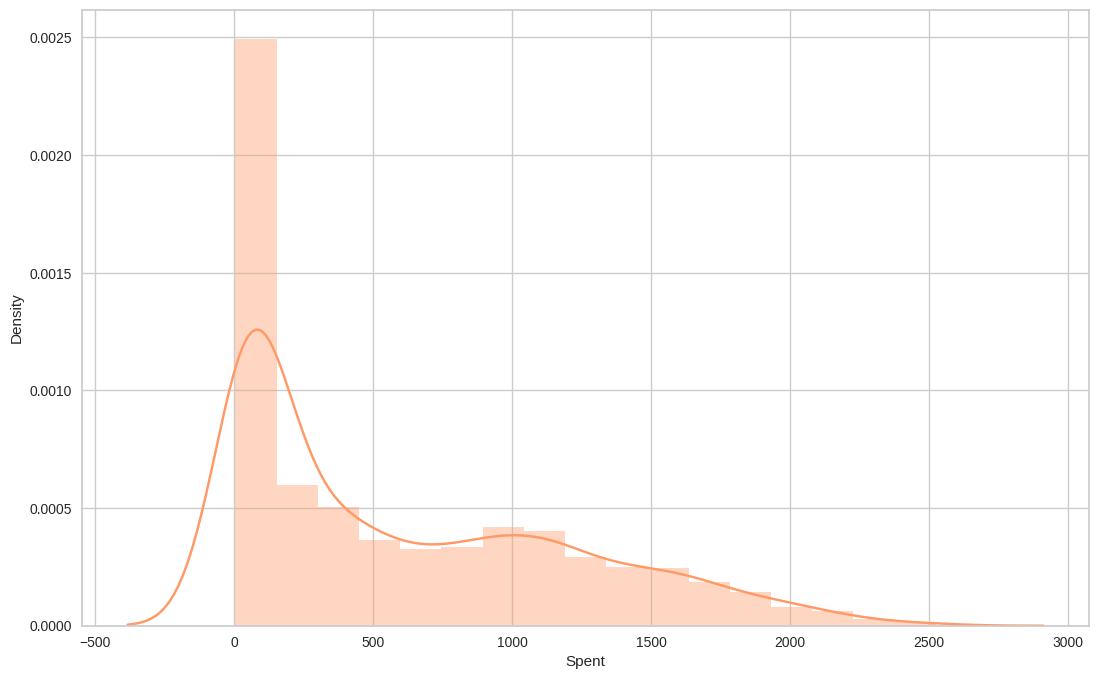

In [31]:
plt.figure(figsize=(13,8))
sns.distplot(data.Spent, color='#ff9966');

In [32]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data['Age'], notched=True, name='Age', marker_color = '#6699ff',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=data['Income'], notched=True, name='Income', marker_color = '#ff0066',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.add_trace(go.Box(y=data['Spent'], notched=True, name='Spent', marker_color = 'lightseagreen',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

fig.update_layout(title_text='<b>Box Plots for Numerical Variables<b>')

fig.show()

In [33]:
data.head(1)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,1617,Alone,0,1,0


In [34]:
numerical = ['Income', 'Recency', 'Age', 'Spent']

**Remove outliers using IQR method:**

In [35]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(data[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = data[i][(data[i] > ul) | (data[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [36]:
detect_outliers(numerical)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    124
239    131
339    125
Name: Age, dtype: int64 

*** Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64 



In [37]:
data = data[(data['Age']<100)]
data = data[(data['Income']<600000)]

In [38]:
data.shape

(2212, 29)

**Check categories are balanced or not**</h3>
</div>

Some categories may appear a lot in the dataset, whereas some other categories appear only in a few number of observations.

* Rare values in categorical variables tend to cause over-fitting, particularly in tree based methods.
* Rare labels may be present in training set, but not in test set, therefore causing over-fitting to the train set.
* Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it.

In [39]:
categorical = [var for var in data.columns if data[var].dtype=='O']

In [40]:
# check the number of different labels
for var in categorical:
    print(data[var].value_counts() / 1.0*(len(data)))
    print()
    print()

Education
Graduate         2466380.0
Postgraduate     1869140.0
Undergraduate     557424.0
Name: count, dtype: float64


Living_With
Partner    3158736.0
Alone      1734208.0
Name: count, dtype: float64




it seems balanced

**Data Encoding and correlation between features**</h3>

In [41]:
categorical

['Education', 'Living_With']

In [42]:
data['Living_With'].unique()

array(['Alone', 'Partner'], dtype=object)

In [43]:
data['Education'] = data['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})

In [44]:
data['Living_With'] = data['Living_With'].map({'Alone':0,'Partner':1})

In [45]:
data.head(3)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,1,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,1617,0,0,1,0
1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70,27,0,2,3,1
2,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59,776,1,0,2,0


<Axes: >

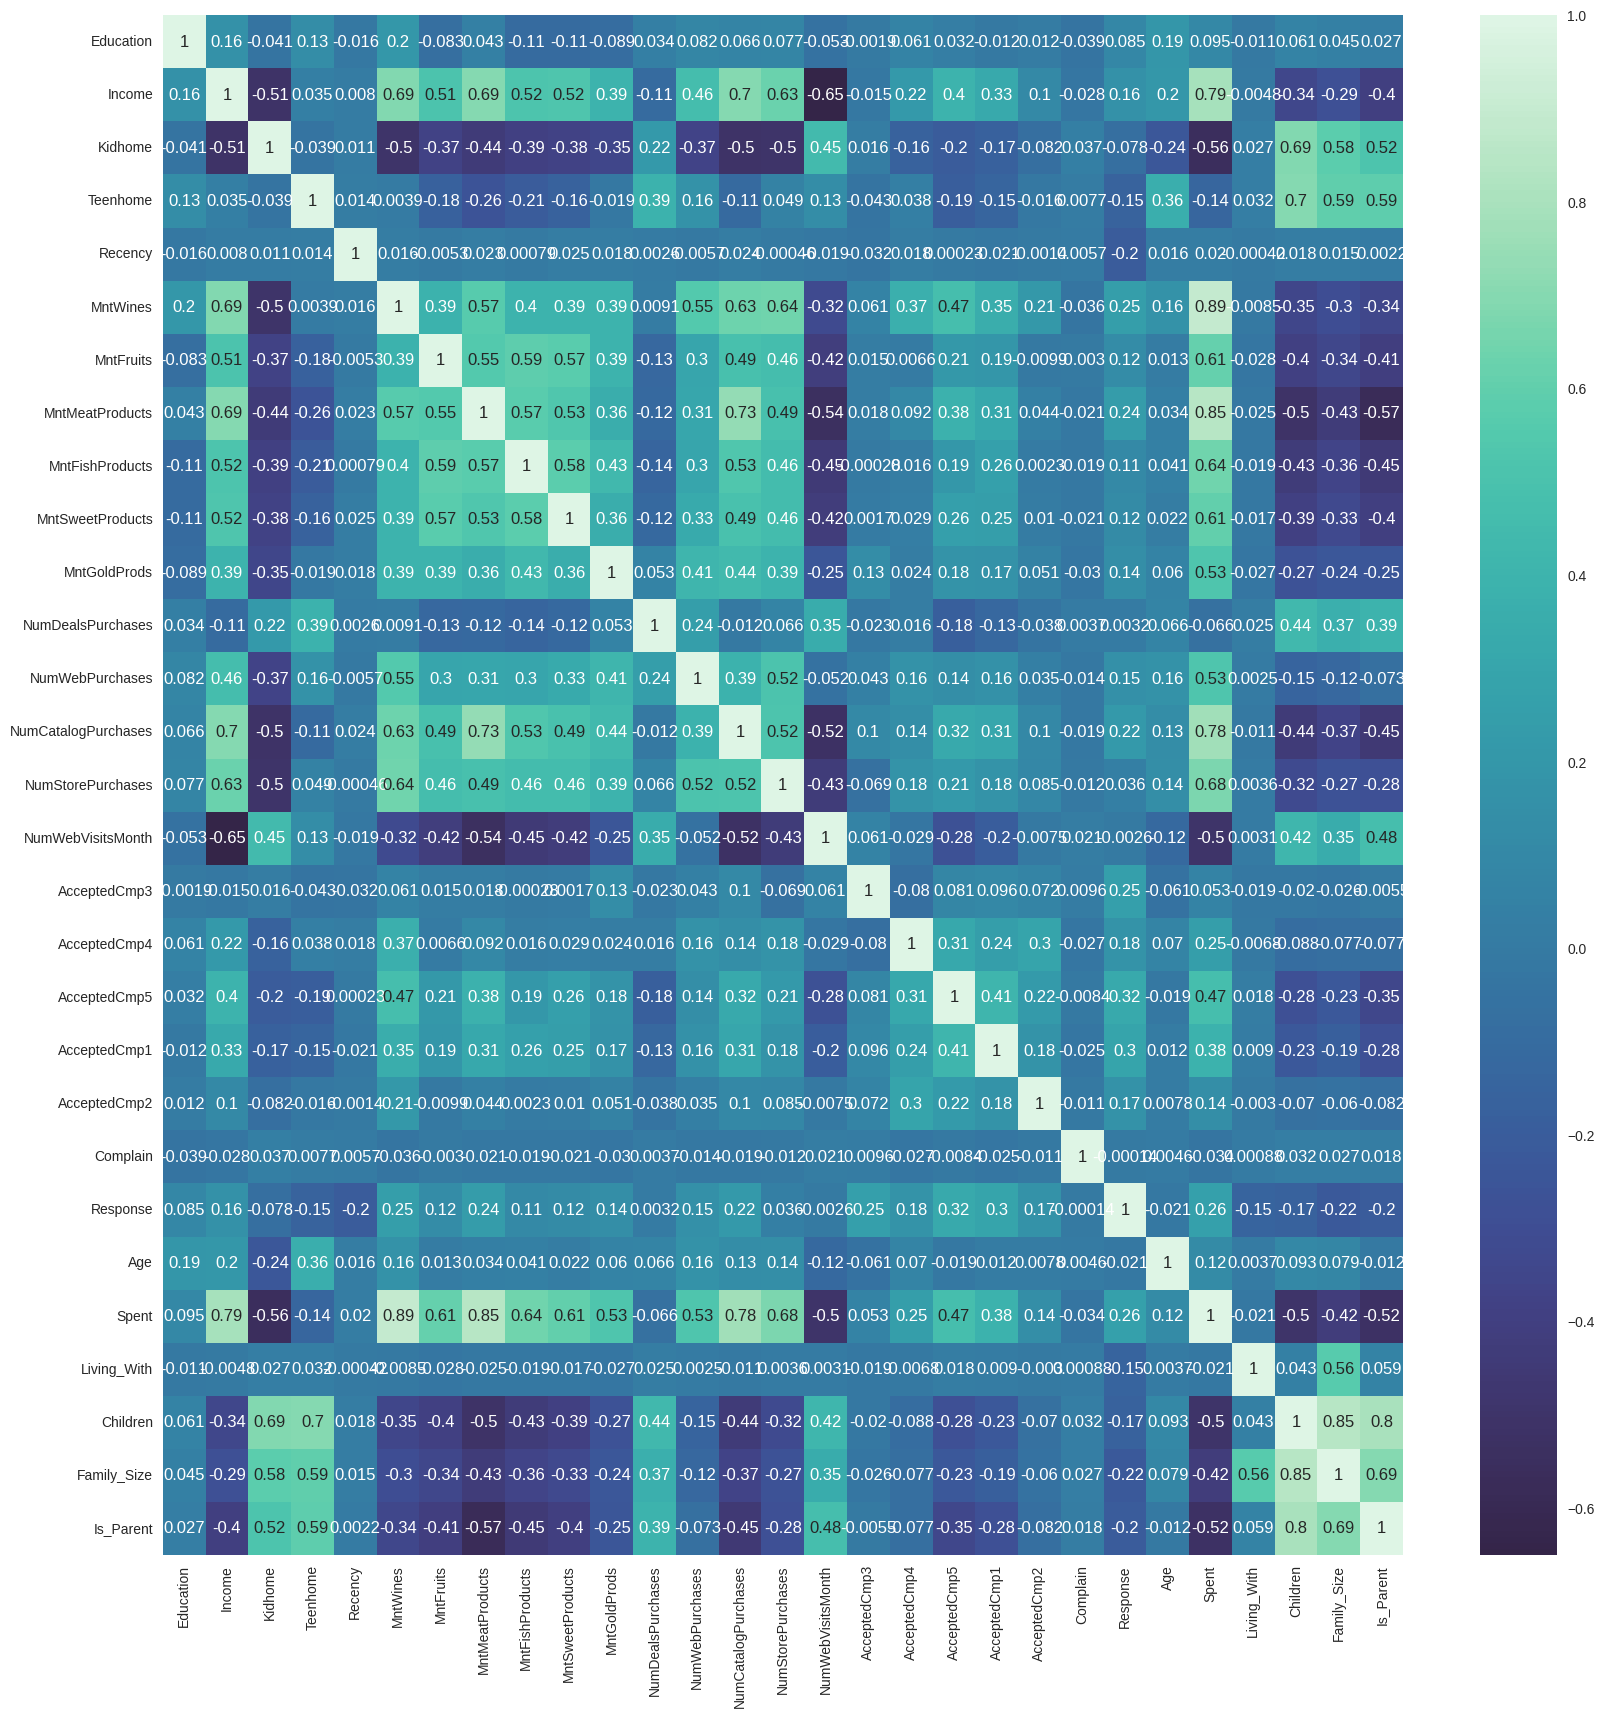

In [46]:
corrmat = data.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)

**Feature Scaling**</h3>

In [47]:
data_old = data.copy()

In [48]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_del, axis=1)

In [49]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [50]:
data.head(3)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.411675,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.411675,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.411675,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139


**Dimensionality Reduction using PCA**</h3>

In [51]:
p = PCA(n_components=3)
p.fit(data)

PCA(n_components=3)

In [52]:
W = p.components_.T
W

array([[ 1.13473069e-02,  1.40722593e-01, -5.06888964e-01],
       [ 2.79487081e-01,  1.78238168e-01, -7.53487181e-02],
       [-2.46222750e-01,  5.22567307e-03,  2.82840893e-01],
       [-9.87087996e-02,  4.62108045e-01, -1.51442253e-01],
       [ 3.52657270e-03,  1.62576400e-02,  3.59782840e-02],
       [ 2.55717074e-01,  2.09383356e-01, -1.16782354e-01],
       [ 2.38397782e-01,  1.10674456e-02,  2.54812900e-01],
       [ 2.85462059e-01,  9.92096517e-03,  7.66998203e-02],
       [ 2.48709825e-01,  2.41511347e-04,  2.53934860e-01],
       [ 2.37301863e-01,  2.16293755e-02,  2.56996539e-01],
       [ 1.88380401e-01,  1.23085130e-01,  1.99378493e-01],
       [-7.82601039e-02,  3.48736676e-01,  1.52581143e-01],
       [ 1.67559798e-01,  2.96785711e-01,  2.27533169e-02],
       [ 2.77349166e-01,  1.05956045e-01,  1.64579314e-02],
       [ 2.41542821e-01,  2.05469366e-01, -7.26746347e-03],
       [-2.25949448e-01,  4.61007611e-02,  9.11200481e-02],
       [ 3.84647028e-02,  2.34781880e-01

In [53]:
pd.DataFrame(W, index=data.columns, columns=['W1','W2','W3'])

,W1,W2,W3
Education,0.011347,0.140723,-0.506889
Income,0.279487,0.178238,-0.075349
Kidhome,-0.246223,0.005226,0.282841
Teenhome,-0.098709,0.462108,-0.151442
Recency,0.003527,0.016258,0.035978
MntWines,0.255717,0.209383,-0.116782
MntFruits,0.238398,0.011067,0.254813
MntMeatProducts,0.285462,0.009921,0.076700
MntFishProducts,0.248710,0.000242,0.253935
MntSweetProducts,0.237302,0.021629,0.256997


In [54]:
p.explained_variance_

array([8.27465625, 2.9209145 , 1.43060151])

In [55]:
p.explained_variance_ratio_

array([0.3759507 , 0.13270882, 0.06499794])

In [56]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

,Explained Variability
1,0.375951
2,0.132709
3,0.064998


In [57]:
p.explained_variance_ratio_.cumsum()

array([0.3759507 , 0.50865952, 0.57365746])

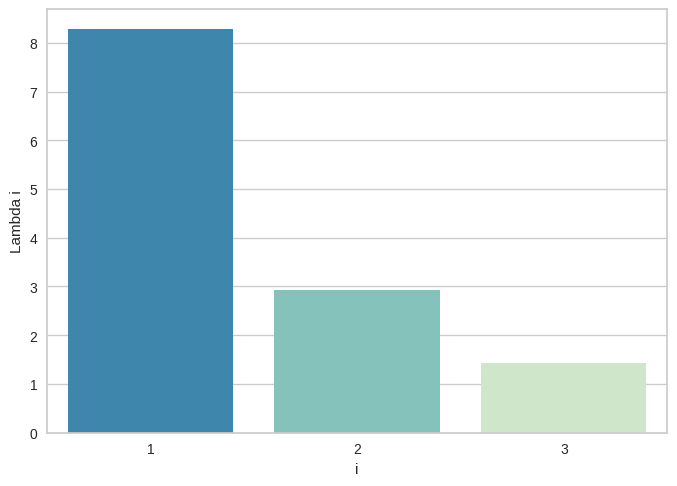

In [58]:
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');

In [59]:
data_PCA = pd.DataFrame(p.transform(data), columns=(['col1', 'col2', 'col3']))

In [60]:
data_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,2.569775e-17,2.876570,-5.915031,-2.548037,-0.784932,2.418554,7.441146
col2,2212.0,0.000000e+00,1.709068,-4.398445,-1.343432,-0.133324,1.243059,6.248204
col3,2212.0,4.175884e-17,1.196079,-3.542553,-0.864080,-0.015482,0.825769,5.036205


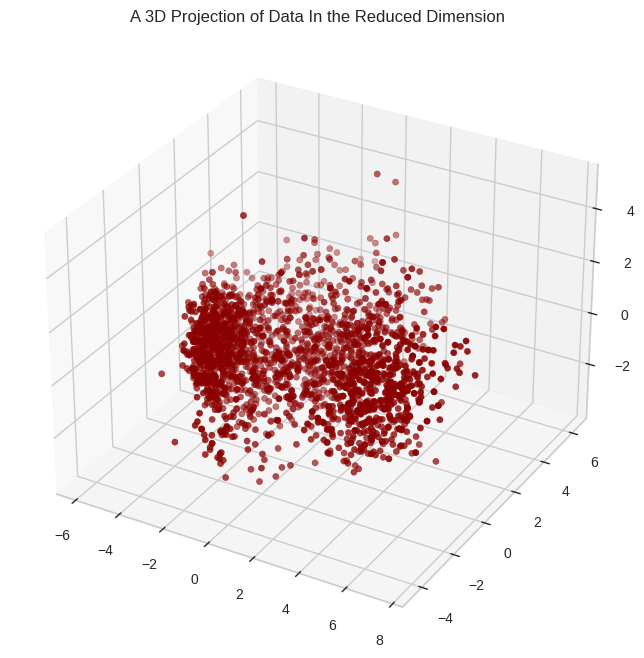

In [61]:
x = data_PCA['col1']
y = data_PCA['col2']
z = data_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

**Clustering and elbow method using Kmeans**</h3>

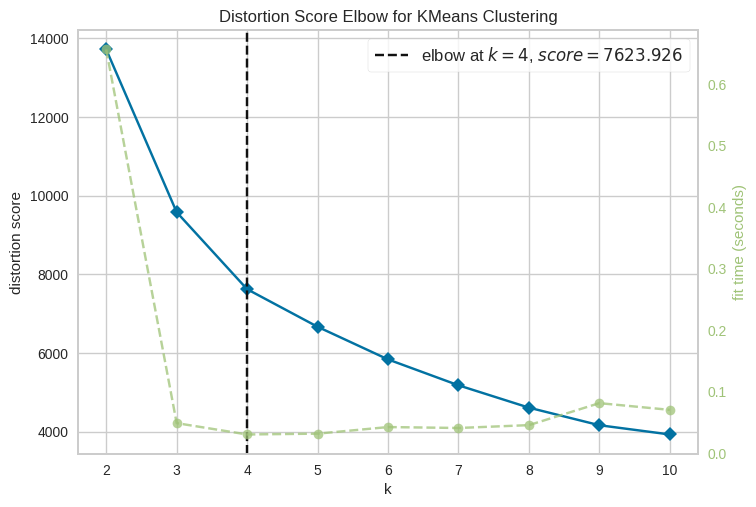

In [62]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_PCA)
Elbow_M.show();

In [63]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data_PCA)
data_PCA['Clusters'] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data['Clusters'] = yhat_AC
data_old['Clusters'] = yhat_AC

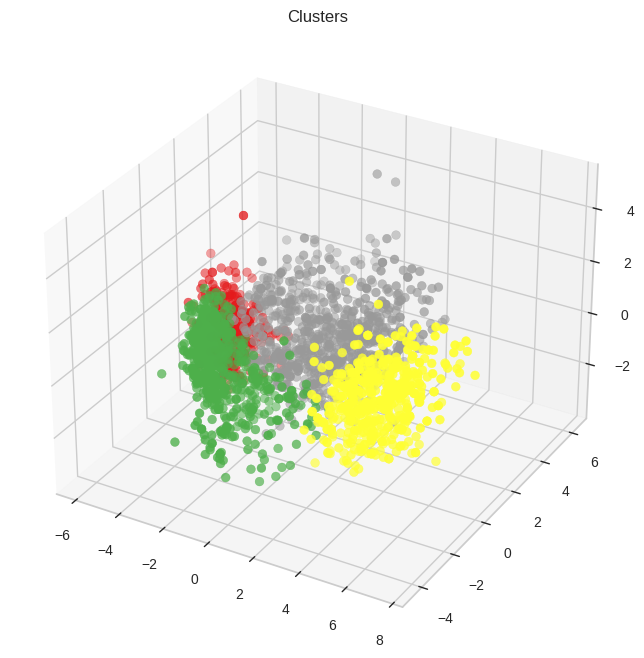

In [64]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=data_PCA['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

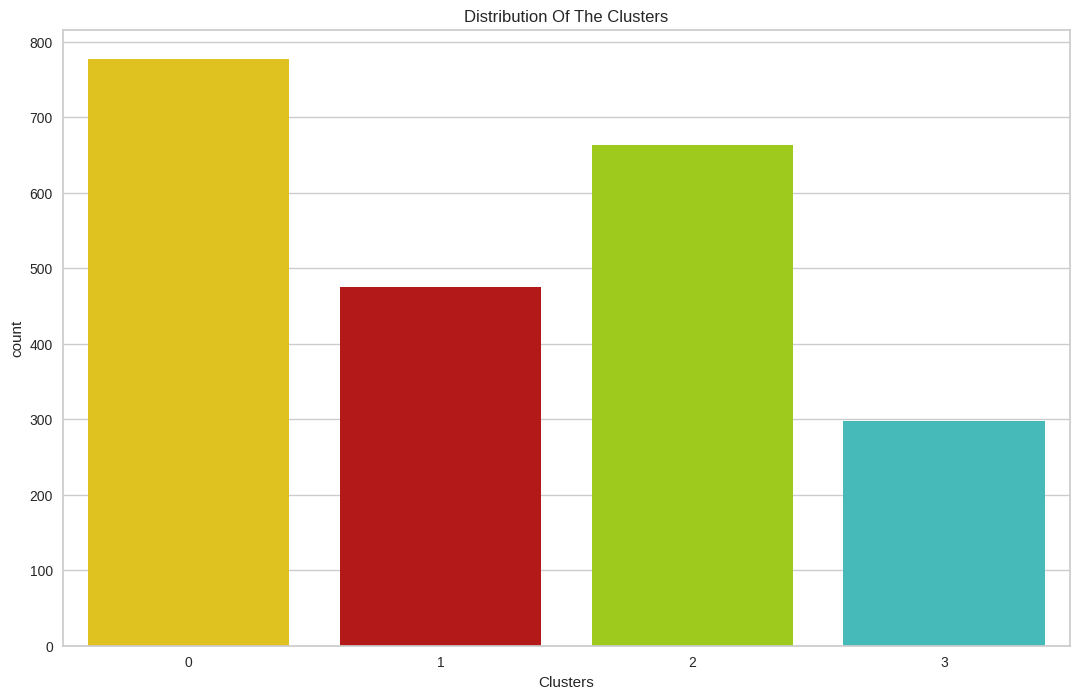

In [65]:
pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=data['Clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

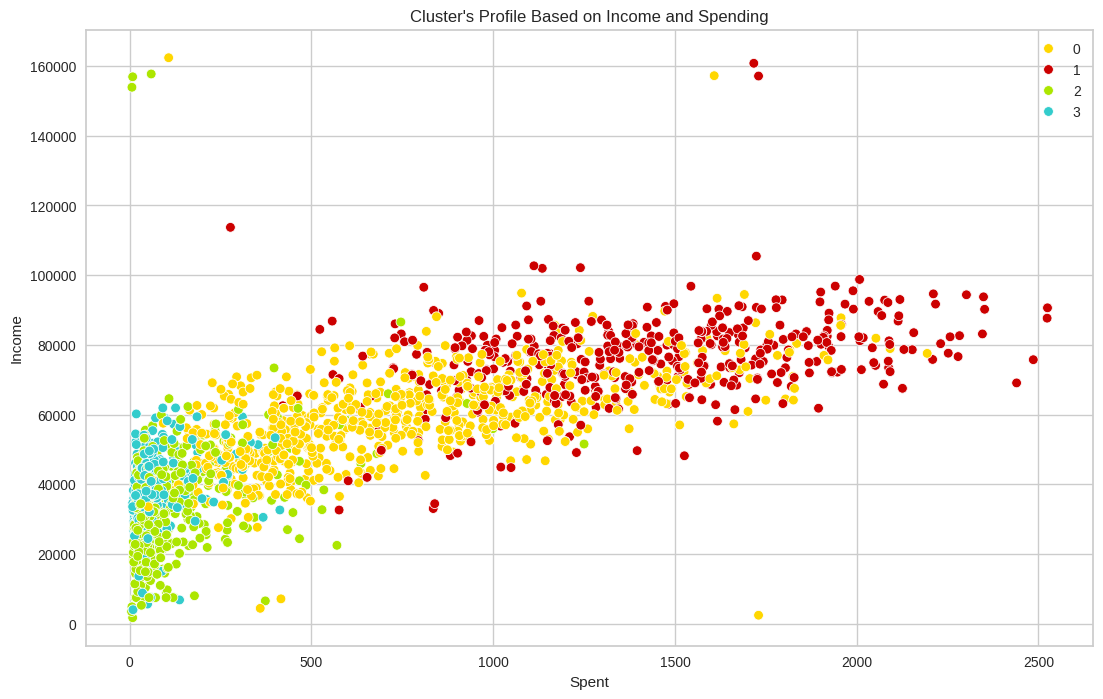

In [66]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=data_old, x=data_old['Spent'], y=data_old['Income'], hue=data_old['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

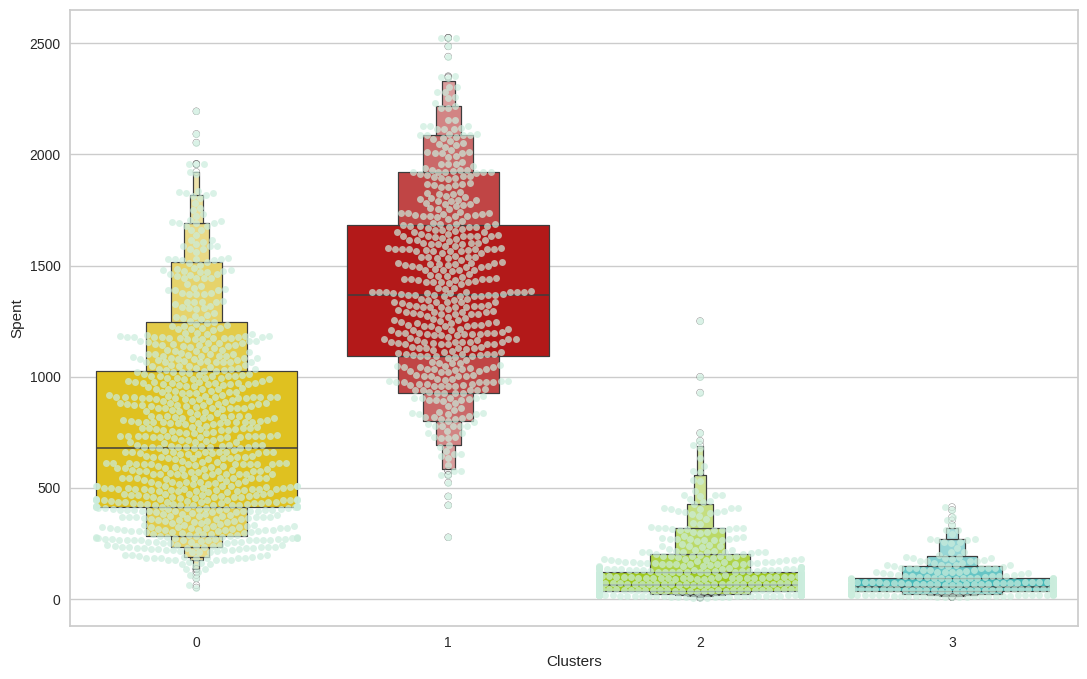

In [67]:
plt.figure(figsize=(13,8))
pl = sns.swarmplot(x=data_old['Clusters'], y=data_old['Spent'], color="#CBEDDD", alpha=0.7)
pl = sns.boxenplot(x=data_old['Clusters'], y=data_old['Spent'], palette=pal)
plt.show();

Plotting count of total campaign accepted.

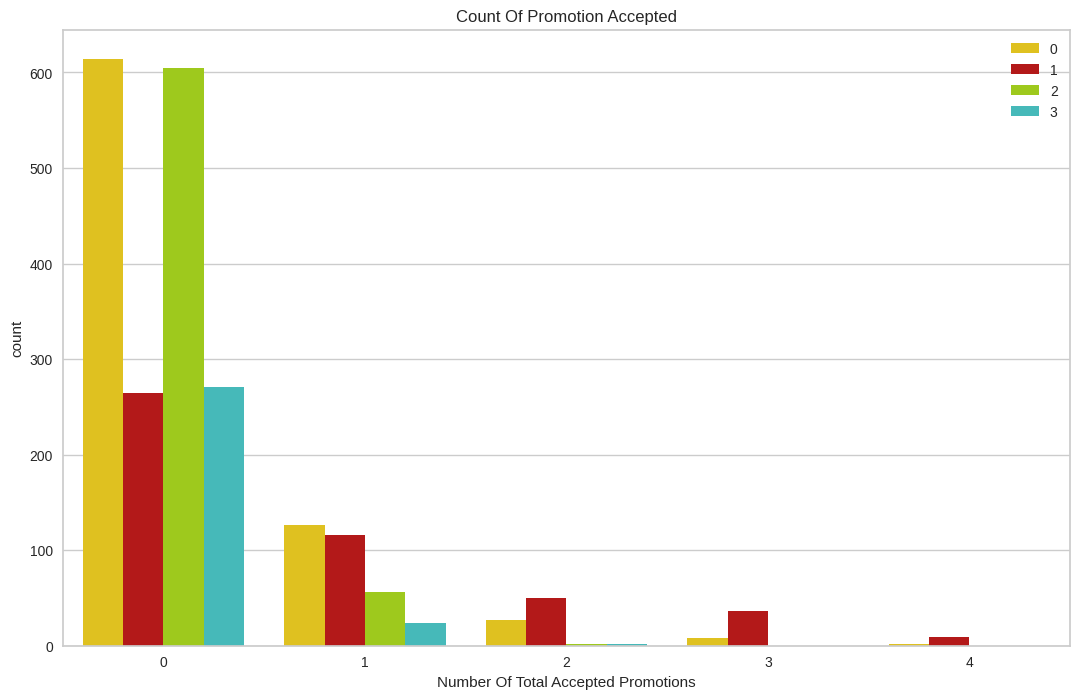

In [68]:
data_old['Total_Promos'] = data_old['AcceptedCmp1']+ data_old['AcceptedCmp2']+ data_old['AcceptedCmp3']+ data_old['AcceptedCmp4']+ data_old['AcceptedCmp5']

plt.figure(figsize=(13,8))
pl = sns.countplot(x=data_old['Total_Promos'], hue=data_old['Clusters'], palette= pal)
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show();

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

Plotting the number of deals purchased

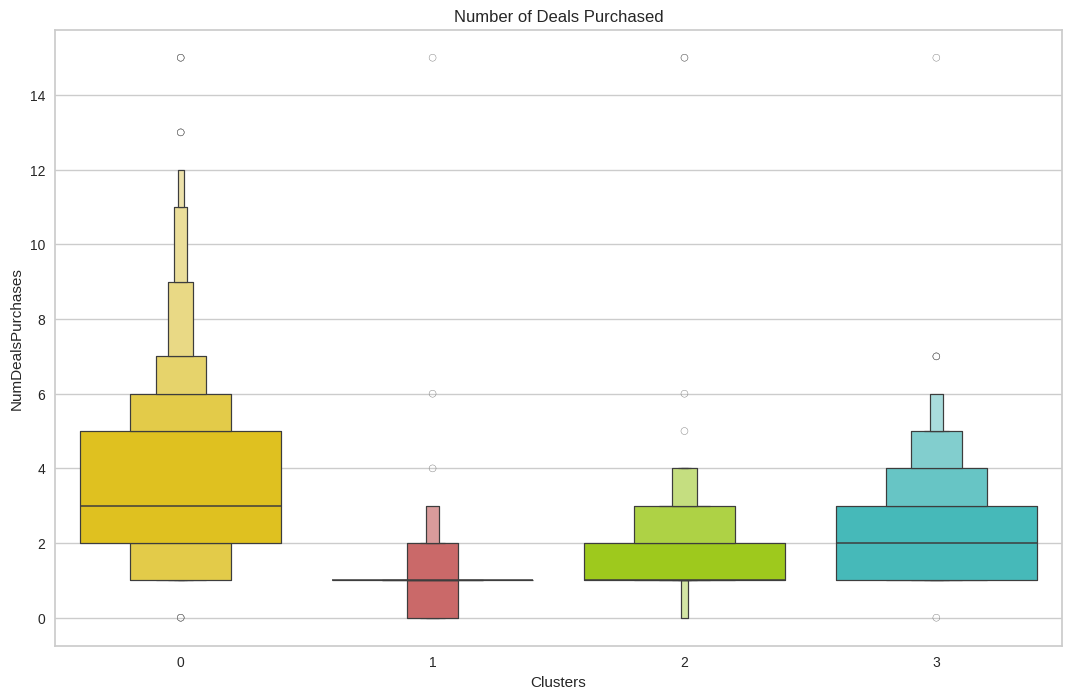

In [69]:
plt.figure(figsize=(13,8))
pl=sns.boxenplot(y=data_old['NumDealsPurchases'],x=data_old['Clusters'], palette= pal)
pl.set_title('Number of Deals Purchased');

Unlike campaigns, the deals offered did well. It has best outcome with cluster 1 and cluster 3. However, our star customers cluster 2 are not much into the deals. Nothing seems to attract cluster 0 overwhelmingly

<Figure size 1300x800 with 0 Axes>

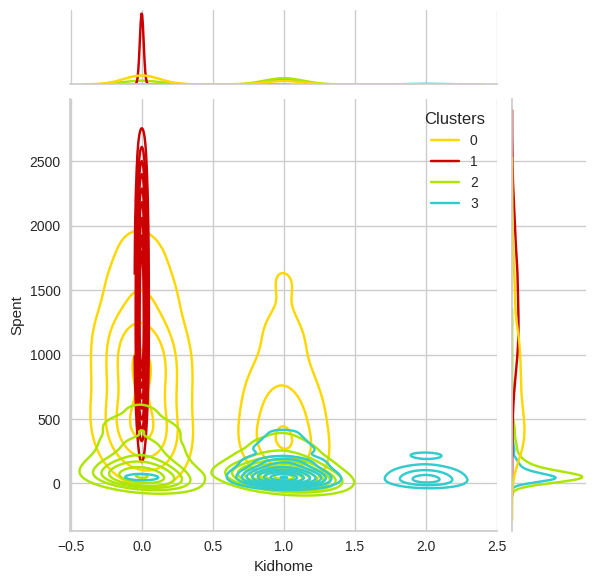

<Figure size 1300x800 with 0 Axes>

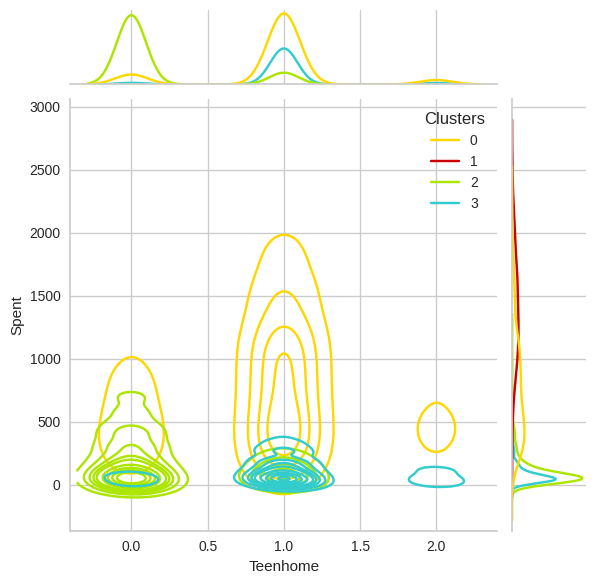

<Figure size 1300x800 with 0 Axes>

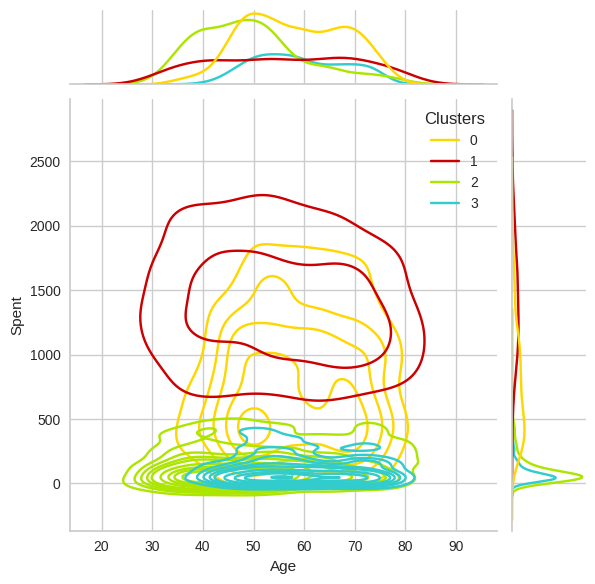

<Figure size 1300x800 with 0 Axes>

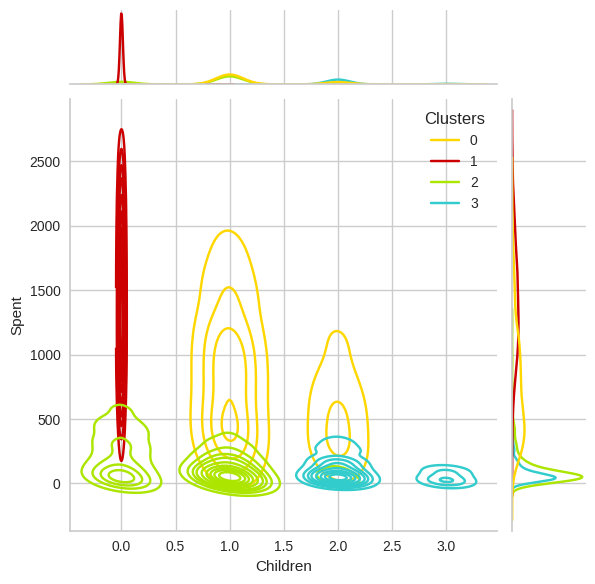

<Figure size 1300x800 with 0 Axes>

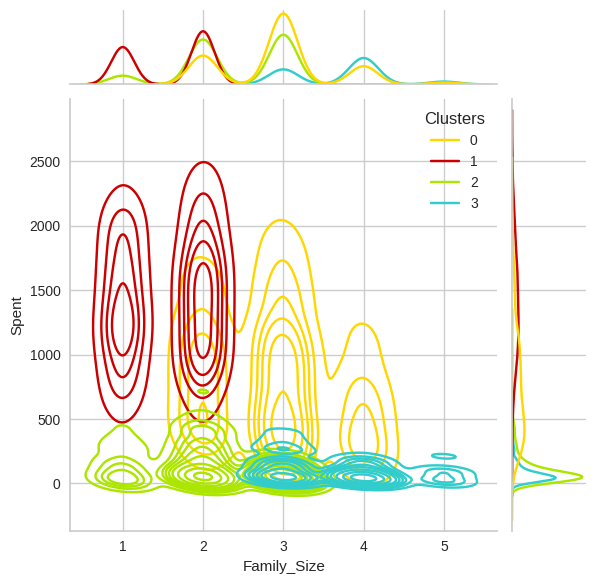

<Figure size 1300x800 with 0 Axes>

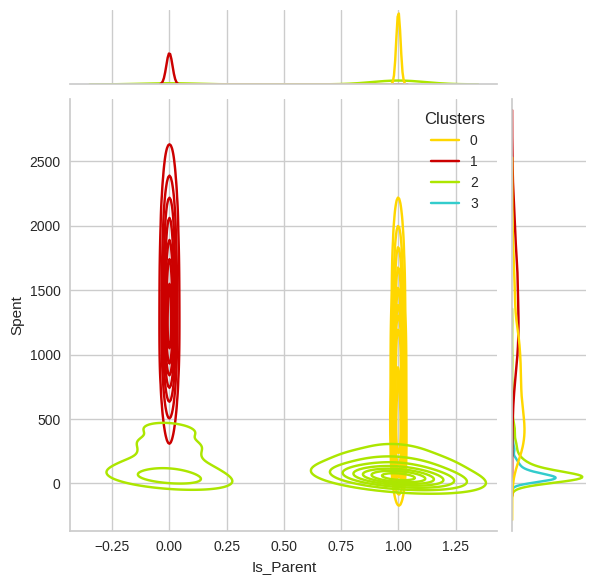

<Figure size 1300x800 with 0 Axes>

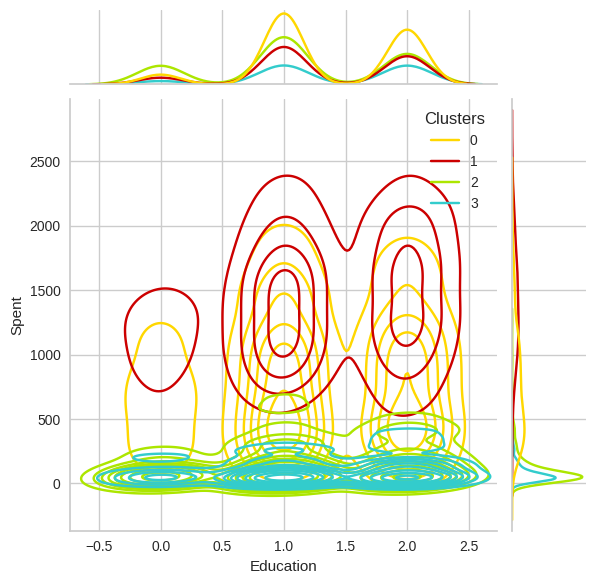

<Figure size 1300x800 with 0 Axes>

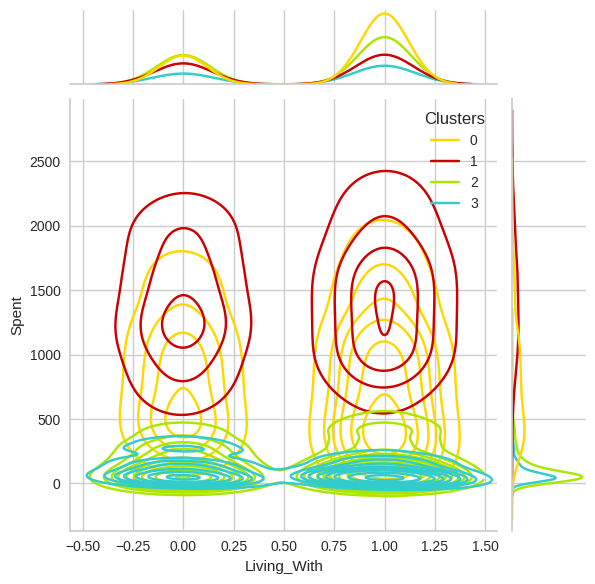

In [70]:
Personal = ['Kidhome', 'Teenhome', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for i in Personal:
    plt.figure(figsize=(13,8))
    sns.jointplot(x=data_old[i], y=data_old['Spent'], hue=data_old['Clusters'], kind='kde', palette=pal);

**Cluster 0:**
* The majority of these people are parents
* At max have 3 members in the family
* They majorly have one kid and typically not tennagers
* Relatively younger

**Cluster 1:**
* Definitely a parent
* At max have 4 members in the family and at least 2
* Most have a teeanger in home
* Relatively older

**Cluster 2:**
* Definitely not a parent
* At max are only 2 members in the family.
* high income and high spending

**Cluster 3:**
* Definitely a parent
* At max have 5 members in the family and at least 2
* Majority of them have a teenager at home